<a href="https://colab.research.google.com/github/Siri2406/OASIS/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Wine Quality Prediction**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('/content/WineQT.csv')

print(df.head())
print(df.info())
print(df.describe())

# Handle missing values
df = df.dropna()

# Feature and target selection
X = df.drop('quality', axis=1)  # Features
y = df['quality']  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

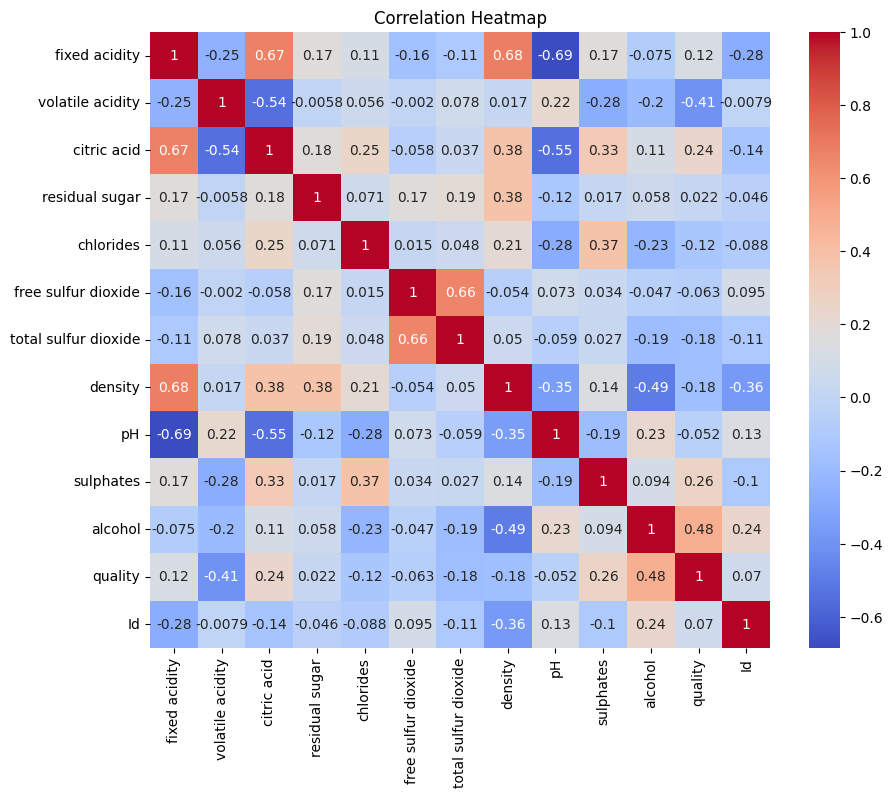

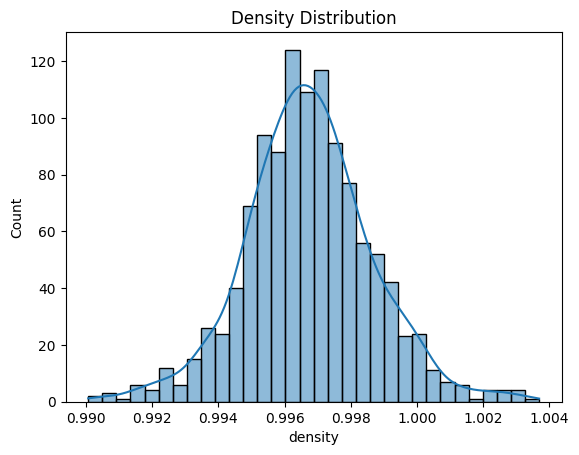

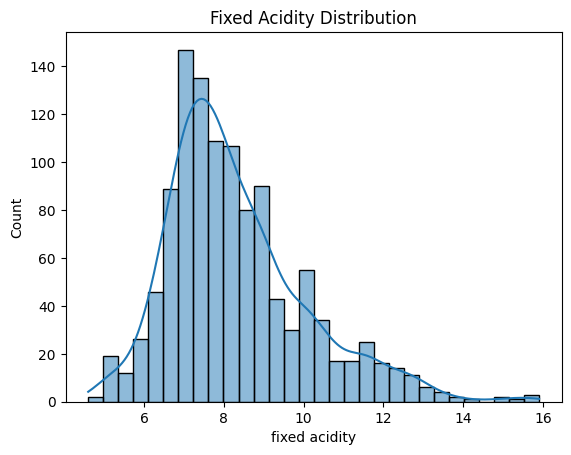

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Distribution of key features
sns.histplot(df['density'], kde=True)
plt.title('Density Distribution')
plt.show()

sns.histplot(df['fixed acidity'], kde=True)
plt.title('Fixed Acidity Distribution')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.linear_model import SGDClassifier

# Initialize and train the model
sgd_model = SGDClassifier(random_state=42)
sgd_model.fit(X_train, y_train)


SGDClassifier(random_state=42)

In [ ]:
from sklearn.svm import SVC

# Initialize and train the model
svc_model = SVC(random_state=42)
svc_model.fit(X_train, y_train)


SVC(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Random Forest Evaluation
rf_preds = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))
print(confusion_matrix(y_test, rf_preds))

# SGD Evaluation
sgd_preds = sgd_model.predict(X_test)
print("SGD Accuracy:", accuracy_score(y_test, sgd_preds))
print(classification_report(y_test, sgd_preds))
print(confusion_matrix(y_test, sgd_preds))

# SVC Evaluation
svc_preds = svc_model.predict(X_test)
print("SVC Accuracy:", accuracy_score(y_test, svc_preds))
print(classification_report(y_test, svc_preds))
print(confusion_matrix(y_test, svc_preds))


Random Forest Accuracy: 0.6899563318777293
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.73      0.75      0.74        96
           6       0.64      0.71      0.67        99
           7       0.76      0.62      0.68        26
           8       0.00      0.00      0.00         2

    accuracy                           0.69       229
   macro avg       0.43      0.41      0.42       229
weighted avg       0.67      0.69      0.68       229

[[ 0  3  3  0  0]
 [ 0 72 24  0  0]
 [ 0 24 70  5  0]
 [ 0  0 10 16  0]
 [ 0  0  2  0  0]]
SGD Accuracy: 0.5851528384279476
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.68      0.78      0.73        96
           6       0.66      0.39      0.49        99
           7       0.34      0.77      0.47        26
           8       0.00      0.00      0.00         2

    accuracy      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

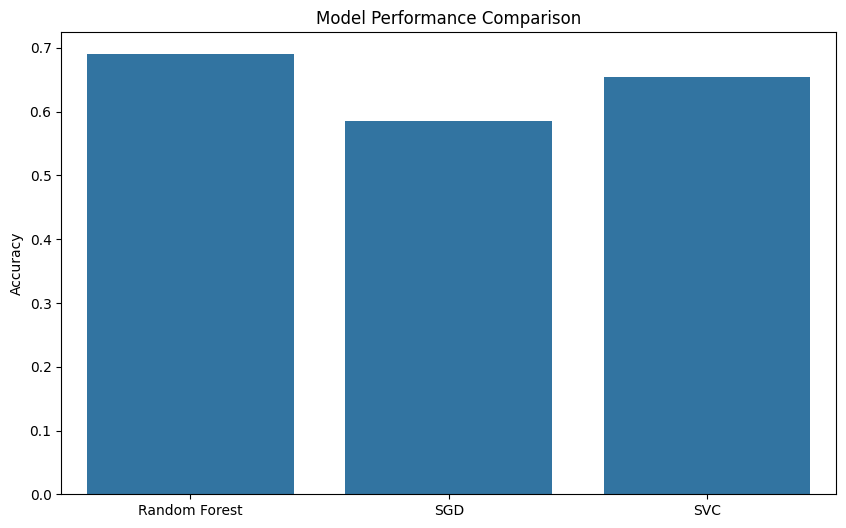

In [ ]:
import numpy as np

# Accuracy scores
models = ['Random Forest', 'SGD', 'SVC']
accuracies = [accuracy_score(y_test, rf_preds), accuracy_score(y_test, sgd_preds), accuracy_score(y_test, svc_preds)]

# Bar plot for comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies)
plt.title('Model Performance Comparison')
plt.ylabel('Accuracy')
plt.show()


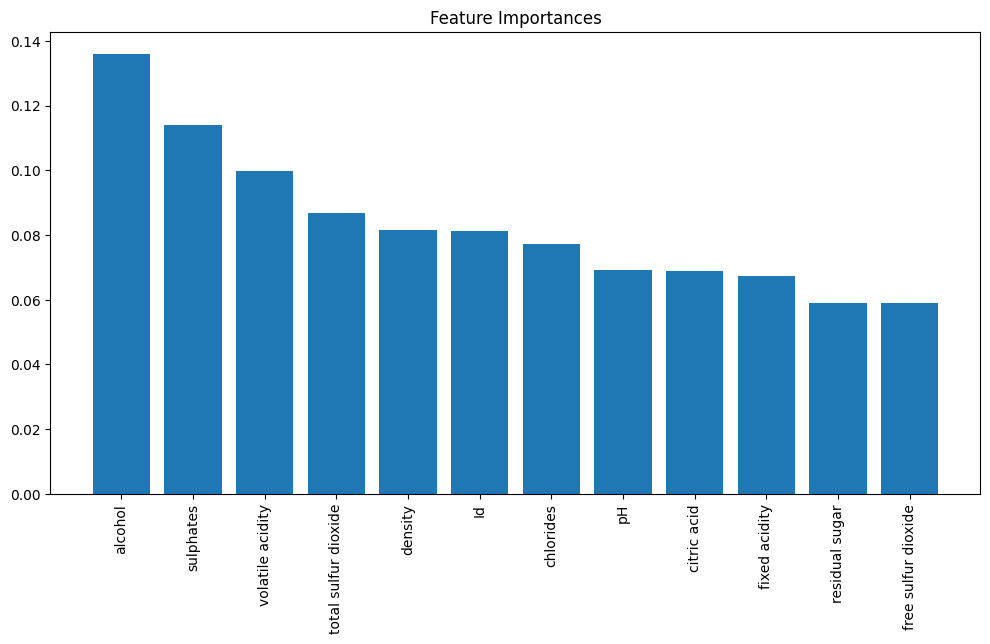

In [ ]:
# Feature importance plot
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.show()
